In [50]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
from matplotlib import cm
import anacal
import astropy.table as astTable
import glob

import numpy as np
import lsst.geom as geom
from astropy.io import ascii as astascii
import anacal
import astropy.table as astTable
import fitsio
import xlens
from matplotlib.ticker import MaxNLocator


In [8]:
bdir = "/lustre/work/xiangchong.li/work/hsc_s23b_data/catalogs/database/"
basedir = f"{bdir}/s23b-anacal/"

bins = np.linspace(-0.1, 0.1, 6)
field_names = ["autumn1", "autumn2", "spring1", "spring2", "spring3", "hectomap"]

In [133]:
fnames = glob.glob("/lustre/work/xiangchong.li/work/hsc_s23b_data/catalogs/database/s23b-anacal/tracts/*/*/leakage2.fits")
e1 = []
r1 = []
e2 = []
r2 = []
e1_4 = []
r1_4 = []
e2_4 = []
r2_4 = []
for f in fnames:
    tab = astTable.Table.read(f)
    e1.append(np.array(tab["e1"]))
    r1.append(np.array(tab["r1"]))
    e2.append(np.array(tab["e2"]))
    r2.append(np.array(tab["r2"]))
    e1_4.append(np.array(tab["e1_4"]))
    r1_4.append(np.array(tab["r1_4"]))
    e2_4.append(np.array(tab["e2_4"]))
    r2_4.append(np.array(tab["r2_4"]))
e1 = np.vstack(e1)
r1 = np.vstack(r1)
e2 = np.vstack(e2)
r2 = np.vstack(r2)
e1_4 = np.vstack(e1_4)
r1_4 = np.vstack(r1_4)
e2_4 = np.vstack(e2_4)
r2_4 = np.vstack(r2_4)

In [145]:
e1_s = []
r1_s = []
e2_s = []
r2_s = []
e1_v = []
r1_v = []
e2_v = []
r2_v = []
for f in fnames:
    tab = astTable.Table.read(f)
    e1_s.append(np.array(tab["e1_s"]))
    r1_s.append(np.array(tab["r1_s"]))
    e2_s.append(np.array(tab["e2_s"]))
    r2_s.append(np.array(tab["r2_s"]))
    e1_v.append(np.array(tab["e1_v"]))
    r1_v.append(np.array(tab["r1_v"]))
    e2_v.append(np.array(tab["e2_v"]))
    r2_v.append(np.array(tab["r2_v"]))
e1_s = np.vstack(e1_s)
r1_s = np.vstack(r1_s)
e2_s = np.vstack(e2_s)
r2_s = np.vstack(r2_s)
e1_v = np.vstack(e1_v)
r1_v = np.vstack(r1_v)
e2_v = np.vstack(e2_v)
r2_v = np.vstack(r2_v)

In [146]:
n_bootstraps = 100
n = e1.shape[0]
indices = np.random.randint(0, n, size=(n_bootstraps, n))
# Compute bootstrap means using gathered indices
up1_2 = np.sum(e1[indices], axis=1)  # shape: (n_bootstraps, D)
down1_2 = np.sum(r1[indices], axis=1)  # shape: (n_bootstraps, D)
up2_2 = np.sum(e2[indices], axis=1)  # shape: (n_bootstraps, D)
down2_2 = np.sum(r2[indices], axis=1)  # shape: (n_bootstraps, D)
# Compute std deviation across bootstrap samples
std1_2 = np.std(up1_2 / down1_2, axis=0)
std2_2 = np.std(up2_2 / down2_2, axis=0)

up1_2 = np.sum(e1_4[indices], axis=1)  # shape: (n_bootstraps, D)
down1_2 = np.sum(r1_4[indices], axis=1)  # shape: (n_bootstraps, D)
up2_2 = np.sum(e2_4[indices], axis=1)  # shape: (n_bootstraps, D)
down2_2 = np.sum(r2_4[indices], axis=1)  # shape: (n_bootstraps, D)
# Compute std deviation across bootstrap samples
std1_4 = np.std(up1_2 / down1_2, axis=0)
std2_4 = np.std(up2_2 / down2_2, axis=0)

# Compute bootstrap means using gathered indices
up1_s = np.sum(e1_s[indices], axis=1)  # shape: (n_bootstraps, D)
down1_s = np.sum(r1_s[indices], axis=1)  # shape: (n_bootstraps, D)
up2_s = np.sum(e2_s[indices], axis=1)  # shape: (n_bootstraps, D)
down2_s = np.sum(r2_s[indices], axis=1)  # shape: (n_bootstraps, D)
# Compute std deviation across bootstrap samples
std1_s = np.std(up1_s / down1_s, axis=0)
std2_s = np.std(up2_s / down2_s, axis=0)

up1_v = np.sum(e1_v[indices], axis=1)  # shape: (n_bootstraps, D)
down1_v = np.sum(r1_v[indices], axis=1)  # shape: (n_bootstraps, D)
up2_v = np.sum(e2_v[indices], axis=1)  # shape: (n_bootstraps, D)
down2_v = np.sum(r2_v[indices], axis=1)  # shape: (n_bootstraps, D)
# Compute std deviation across bootstrap samples
std1_v = np.std(up1_v / down1_v, axis=0)
std2_v = np.std(up2_v / down2_v, axis=0)

In [147]:
ave1_2 = np.sum(e1, axis=0) / np.sum(r1, axis=0)
print(ave1_2)
print(std1_2)
ave2_2 = np.sum(e2, axis=0) / np.sum(r2, axis=0)
print(ave2_2)
print(std2_2)

ave1_s = np.sum(e1_s, axis=0) / np.sum(r1_s, axis=0)
print(ave1_s)
print(std1_s)
ave2_s = np.sum(e2_s, axis=0) / np.sum(r2_s, axis=0)
print(ave2_s)
print(std2_s)

[ 0.00049905 -0.00011711 -0.00083247]
[8.66949629e-05 6.05858104e-05 1.92837051e-04]
[ 0.00087231  0.00020962 -0.00088761]
[1.26881089e-04 5.26571635e-05 9.08205071e-05]
[8.62176535e-05 2.87410634e-04 6.47817034e-04]
[7.47133061e-05 7.16702141e-05 1.12945921e-04]
[5.26051369e-05 1.49488662e-06 1.19147277e-04]
[7.80605657e-05 8.15192662e-05 1.14760598e-04]


In [148]:
ave1_4 = np.sum(e1_4, axis=0) / np.sum(r1_4, axis=0)
print(ave1_4)
print(std1_4)
ave2_4 = np.sum(e2_4, axis=0) / np.sum(r2_4, axis=0)
print(ave2_4)
print(std2_4)

ave1_v = np.sum(e1_v, axis=0) / np.sum(r1_v, axis=0)
print(ave1_v)
print(std1_v)
ave2_v = np.sum(e2_v, axis=0) / np.sum(r2_v, axis=0)
print(ave2_v)
print(std2_v)

[ 9.57220557e-04  8.89931921e-05 -2.36310820e-04]
[2.03788932e-04 5.59934513e-05 9.85404120e-05]
[1.90053353e-04 7.45954773e-05 1.33597929e-04]
[1.33843728e-04 5.03269251e-05 2.48916134e-04]
[ 0.0001091  -0.00011679 -0.000158  ]
[1.07507552e-04 7.10792172e-05 1.07200812e-04]
[7.68857079e-05 7.15050827e-05 2.31866708e-04]
[1.22246472e-04 7.40990539e-05 7.97156106e-05]


In [170]:
np.sum(e1_v) / np.sum(r1_v)

1.6173597513450714e-05

In [171]:
np.sum(e2_v) / np.sum(r2_v)

0.00010592034550567824

In [172]:
np.sum(e2_s) / np.sum(r2_s)

4.135547547413429e-05

In [173]:
np.sum(e1_s) / np.sum(r1_s)

0.0002667296561578193

In [174]:
np.sum(e2) / np.sum(r2)

4.9171390494856523e-05

In [152]:
x_data = np.vstack(
    [tab["e_psf_2"], tab["e_psf_2"], tab["e_psf_4"], tab["e_psf_4"], tab["size"], tab["size"], tab["var"], tab["var"]]
)
y_data = np.vstack([ave1_2, ave2_2, ave1_4, ave2_4, ave1_s, ave2_s, ave1_v, ave2_v])
y_errs = np.vstack([std1_2, std2_2, std1_4, std2_4, std1_s, std2_s, std1_v, std2_v])

[-0.01554268 -0.0001189 ] 0.0005186138441796982
[-0.02489939  0.00019095] 0.004307896527916333
[-1.79297225e-02  9.47368906e-05] 0.006206188118290872
[-5.07733513e-03  7.51302613e-05] 0.002338149805124488
[ 0.00368729 -0.00208127] 0.0008049800347905575
[5.34809295e-05 5.22559801e-06] 0.0008201672050559998
[-0.09987562  0.00030835] 0.05885922416083412
[ 0.0877064  -0.00025332] 0.042135142310152876


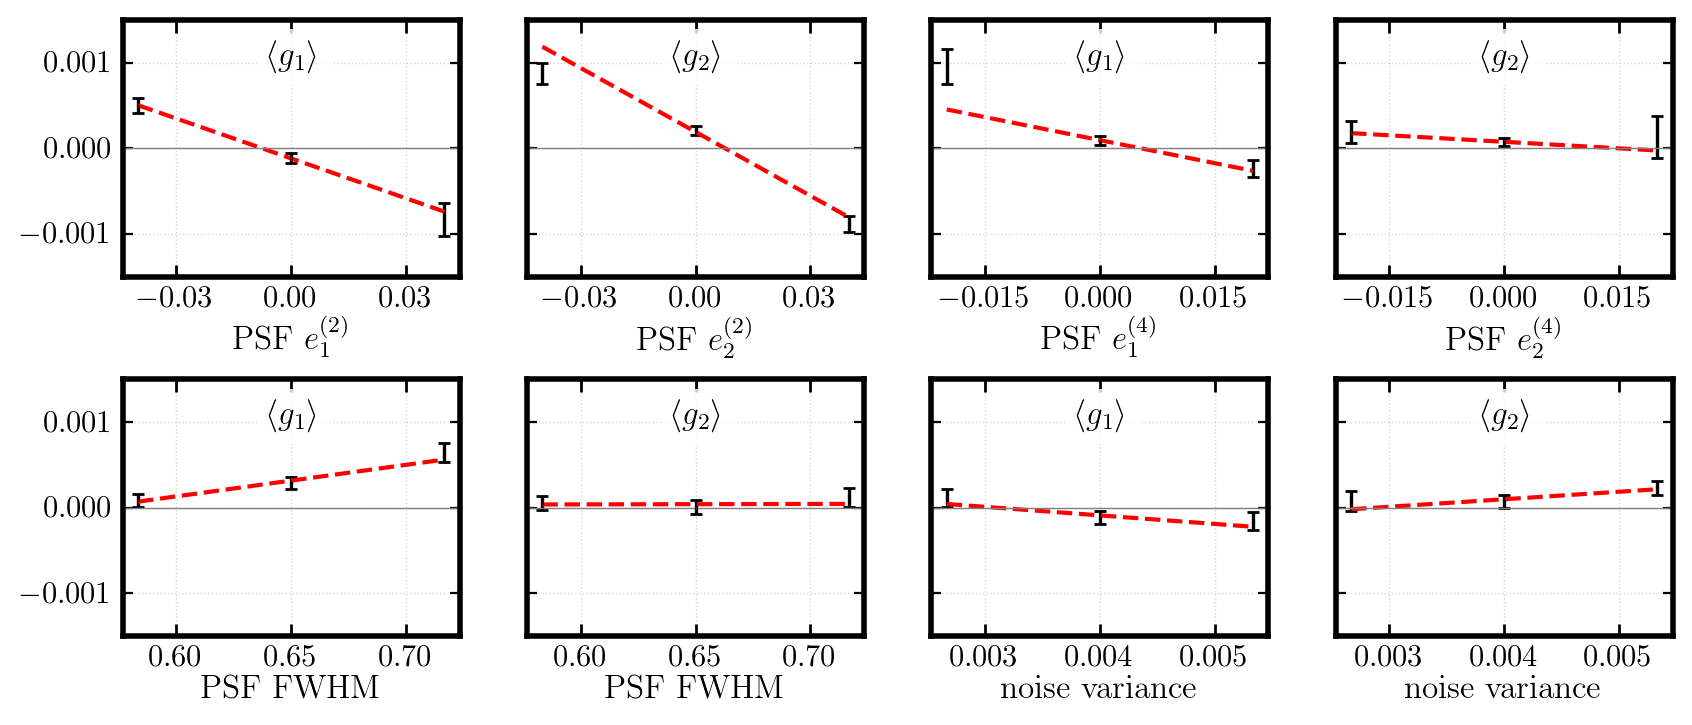

In [185]:
# Prepare figure
fig, axes = plt.subplots(2, 4, figsize=(10, 4), sharey='row', gridspec_kw={'hspace': 0.4})
axes = axes.flatten()
titles = [
    r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$',
    r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$',
    r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$',
    r'$\langle g_1 \rangle$', r'$\langle g_2 \rangle$'
]

# Loop over panels
for i in range(8):
    ax = axes[i]
    x = x_data[i]
    y = y_data[i]
    yerr = y_errs[i]

    # Scatter with error bars
    ax.errorbar(x, y, yerr=yerr, fmt='s', color='black', markersize=0.1, capsize=2, linewidth=1.2)
    # Linear fits
    coeffs, cov = np.polyfit(x, y, deg=1, w= 1./ yerr ** 2., cov=True)
    print(coeffs, np.sqrt(cov[0,0]))
    xfit = np.linspace(np.min(x), np.max(x), 100)
    ax.plot(xfit, np.polyval(coeffs, xfit), 'r--', linewidth=1.5)

    ax.axhline(0, color='gray', linewidth=0.5)
    ax.grid(True, linestyle=':', linewidth=0.5)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

    ax.text(0.43, 0.92, titles[i], transform=ax.transAxes,
        fontsize=12, va='top', ha='left',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )
    
    #ax.text(0.25, 0.20, r"corr=$%.3f$" %coeffs[0], transform=ax.transAxes,
    #    fontsize=12, va='top', ha='left', color="red",
    #    bbox=dict(facecolor='white', edgecolor='none', alpha=0.1)
    #)
    ax.set_ylim(-0.0015, 0.0015)

# X-labels
axes[0].set_xlabel(r'PSF $e_1^{(2)}$', fontsize=12, labelpad=1)
axes[1].set_xlabel(r'PSF $e_2^{(2)}$', fontsize=12, labelpad=1)
axes[2].set_xlabel(r'PSF $e_1^{(4)}$', fontsize=12, labelpad=1)
axes[3].set_xlabel(r'PSF $e_2^{(4)}$', fontsize=12, labelpad=1)
axes[4].set_xlabel('PSF FWHM', fontsize=12, labelpad=1)
axes[5].set_xlabel('PSF FWHM', fontsize=12, labelpad=1)
axes[6].set_xlabel('noise variance', fontsize=12, labelpad=1)
axes[7].set_xlabel('noise variance', fontsize=12, labelpad=1)
for ax in axes:
    ax.tick_params(labelsize=11)

plt.show()

In [157]:
tab["size"]

0.5833333333333334
0.65
0.7166666666666667


In [169]:
(0.65 - 0.5833333333333334) / 2.0


0.033333333333333326

In [3]:
print(np.sum(e1, axis=0) / np.sum(r1, axis=0))
print(np.sum(e2, axis=0) / np.sum(r2, axis=0))

[-0.00113163 -0.00075775 -0.00012241  0.00121748  0.00683695]
[-0.00763407 -0.00085609  0.00051767  0.00031706  0.00130335]


In [50]:
e1 = np.vstack(e1)
r1 = np.vstack(r1)
e2 = np.vstack(e2)
r2 = np.vstack(r2)
print(np.sum(e1, axis=0) / np.sum(r1, axis=0))
print(np.sum(e2, axis=0) / np.sum(r2, axis=0))

[-2.55391923e-03 -1.27507023e-03 -1.41093622e-05  1.07823543e-03
  5.42279615e-03]
[-0.00855016 -0.001097    0.000456    0.00066845  0.00193919]


In [48]:
e1 = np.vstack(e1)
r1 = np.vstack(r1)
e2 = np.vstack(e2)
r2 = np.vstack(r2)
print(np.sum(e1, axis=0) / np.sum(r1, axis=0))
print(np.sum(e2, axis=0) / np.sum(r2, axis=0))

[-0.00176379 -0.00102383 -0.00020885  0.0008472   0.00838587]
[-0.01062557 -0.00075082  0.00042726  0.00085771  0.0018049 ]


In [39]:
e1 = np.vstack(e1)
r1 = np.vstack(r1)
e2 = np.vstack(e2)
r2 = np.vstack(r2)
print(np.sum(e1, axis=0) / np.sum(r1, axis=0))
print(np.sum(e2, axis=0) / np.sum(r2, axis=0))

[-0.00249796 -0.00121445 -0.00012277  0.00117999  0.0149325 ]
[-0.01203606 -0.00128485  0.00035569  0.00104798  0.00221883]


In [34]:
e1 = np.vstack(e1)
r1 = np.vstack(r1)
e2 = np.vstack(e2)
r2 = np.vstack(r2)
print(np.sum(e1, axis=0) / np.sum(r1, axis=0))
print(np.sum(e2, axis=0) / np.sum(r2, axis=0))

[-3.21961036e-03 -1.45238792e-03  8.54375104e-05  1.53885371e-03
  1.22786575e-02]
[-0.01015459 -0.00162486  0.00036568  0.00077233  0.0022688 ]


In [30]:
np.sum(e1, axis=0) / np.sum(r1, axis=0) 

array([-0.00322353, -0.00148534,  0.00012425,  0.00179929,  0.01222519])

In [31]:
np.sum(e2, axis=0) / np.sum(r2, axis=0) 

array([-0.01062729, -0.00168023,  0.00034356,  0.00074443,  0.00210668])

In [25]:
(1.82853823e-03 + 1.50869266e-03) / 0.08

0.041715386125

In [36]:
1.1 / 4

0.275

In [27]:
tab["bin_center"]

-0.08
-0.04000000000000001
-6.938893903907228e-18
0.039999999999999994
0.08


In [130]:
a = np.linspace(-0.06, 0.06, 4)
print((a[1:] + a[:-1]) / 2.0)

[-4.00000000e-02  3.46944695e-18  4.00000000e-02]


In [132]:
a = np.linspace(-0.03, 0.03, 4)
print((a[1:] + a[:-1]) / 2.0)

[-2.00000000e-02  1.73472348e-18  2.00000000e-02]


In [121]:
nom1 = np.zeros(len(bins) - 1)
nom2 = np.zeros(len(bins) - 1)
denom1 = np.zeros(len(bins) - 1)
denom2 = np.zeros(len(bins) - 1)
for field in field_names[0: 1]:
    data = fitsio.read(os.path.join(basedir, f"{field}.fits"))
    psf_mxx = data["i_ext_shapeHSM_HsmPsfMoments_xx"]
    psf_myy = data["i_ext_shapeHSM_HsmPsfMoments_yy"]
    psf_mxy = data["i_ext_shapeHSM_HsmPsfMoments_xy"]
    e1_psf = (psf_mxx - psf_myy) / (psf_mxx + psf_myy) / 2.0
    e1_psf[np.isnan(e1_psf)] = 0.0
    e2_psf = psf_mxy / (psf_mxx + psf_myy)
    e2_psf[np.isnan(e2_psf)] = 0.0
    
    nom1 = nom1 + np.histogram(e1_psf, weights=data["fpfs_e1"], density=False, bins=bins)[0]
    denom1= denom1 + np.histogram(e1_psf, weights=data["fpfs_de1_dg1"], density=False, bins=bins)[0]
    nom2 = nom2 + np.histogram(e2_psf, weights=data["fpfs_e2"], density=False, bins=bins)[0]
    denom2= denom2 + np.histogram(e2_psf, weights=data["fpfs_de2_dg2"], density=False, bins=bins)[0]
    del data

In [123]:
c1 = nom1 / denom1
c2 = nom2 / denom2
bc = (bins[:-1] + bins[1:]) / 2.0

In [110]:
print(np.sum(nom1[1:-1]) / np.sum(denom1[1:-1]))
print(np.sum(nom2[1:-1]) / np.sum(denom2[1:-1]))

4.511254058439455e-05
-1.6566057495526545e-05


0.05981378768354853

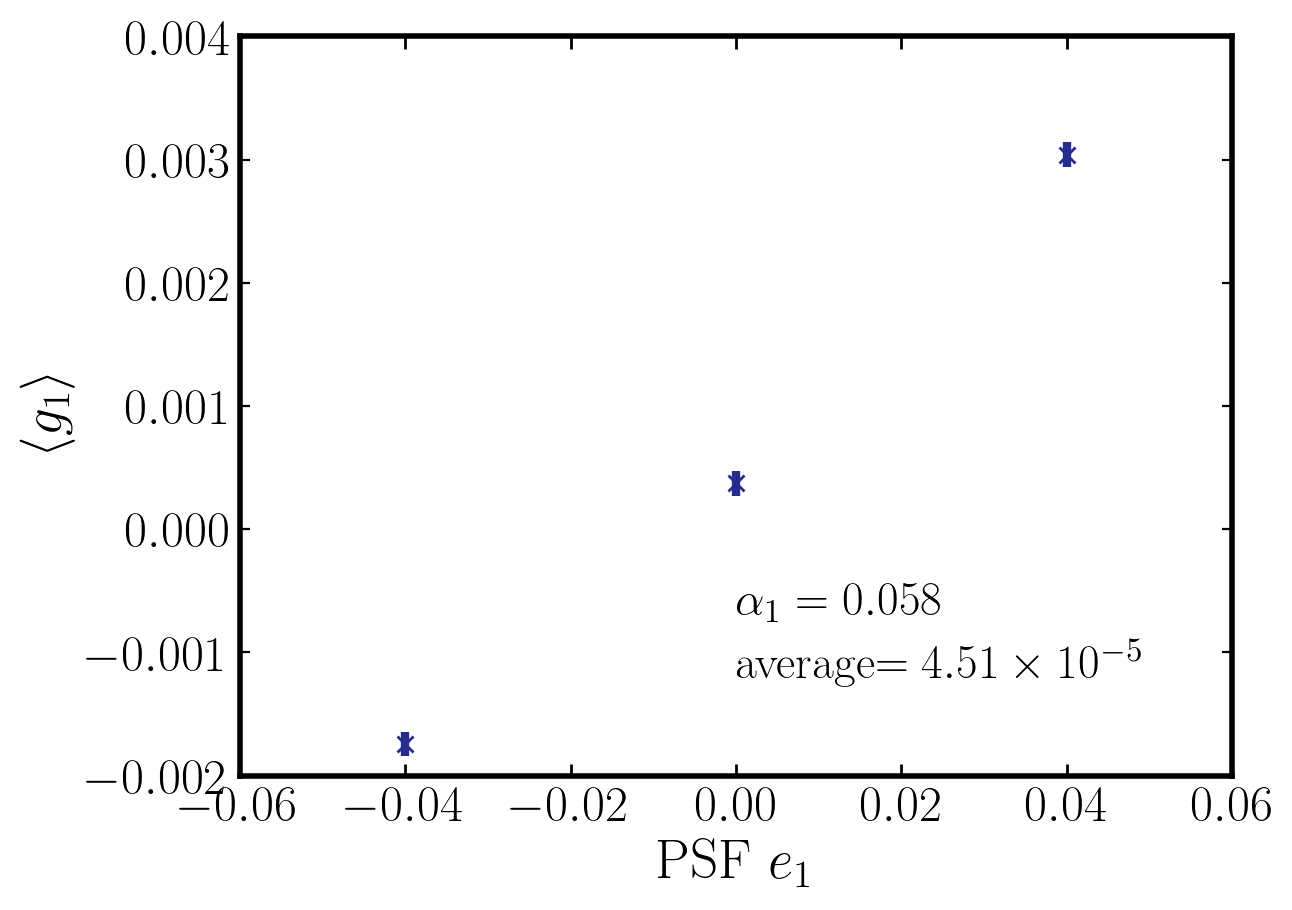

In [132]:
err = np.ones_like(c1) * 1e-4
plt.errorbar(bc, c1, err, marker='x', ls='')
#plt.plot(bc, c1)
plt.xlim(-0.06, 0.06)
plt.ylim(-0.002, 0.004)
plt.text(0.0, -0.0007, r"$\alpha_1 = 0.058$")
plt.text(0.0, -0.0012, r"average$= 4.51 \times 10^{-5}$")
plt.xlabel(r"PSF $e_1$")
plt.ylabel(r"$\langle g_1\rangle$")
(c1[-2] - c1[1]) / (bc[-2] - bc[1])

-0.050502371252640725

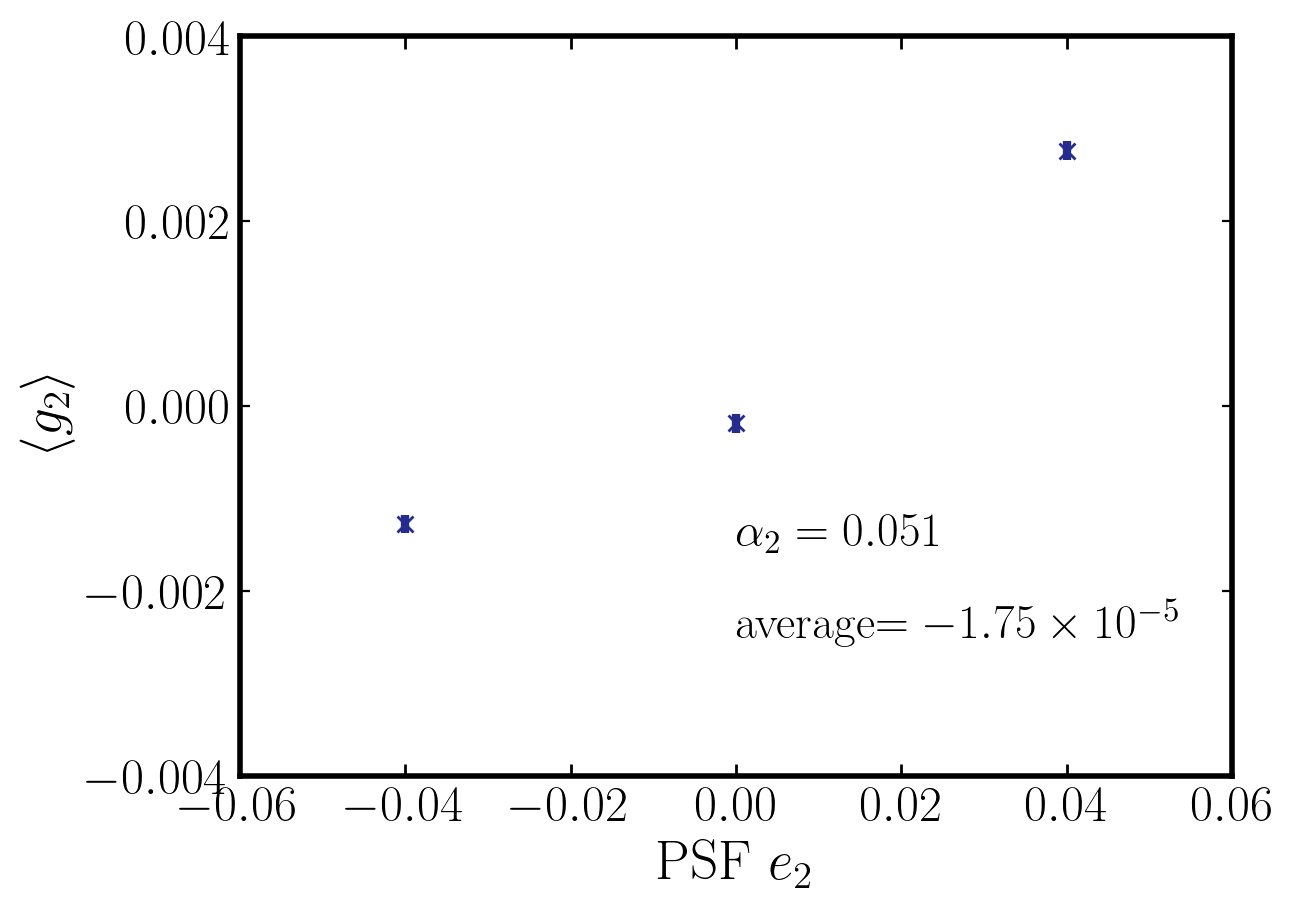

In [137]:
plt.errorbar(-bc, c2, err, marker='x', ls='')
plt.xlim(-0.06, 0.06)
plt.ylim(-0.004, 0.004)
plt.text(0.0, -0.0015, r"$\alpha_2 = 0.051$")
plt.text(0.0, -0.0025, r"average$=-1.75 \times 10^{-5}$")
plt.xlabel(r"PSF $e_2$")
plt.ylabel(r"$\langle g_2\rangle$")
(c2[-2] - c2[1]) / (bc[-2] - bc[1])

In [80]:
np.histogram(e1_psf, density=False, bins=bins)

(array([  73921, 1238489, 5261955, 1198977,    2286]),
 array([-0.1 , -0.06, -0.02,  0.02,  0.06,  0.1 ]))

In [21]:
fnames = glob.glob("/work/xiangchong.li/superonionGW/code/hsc_final/HSC_S23B_Shapes/sql/database/s23b-galaxy/tracts/*.fits")
e1_2 = []
e2_2 = []
e1_4 = []
e2_4 = []
for fn in fnames[0:100]:
    d = fitsio.read(fn)
    psf_mxx = d["i_hsmpsfmoments_shape11"]
    psf_myy = d["i_hsmpsfmoments_shape22"]
    psf_mxy = d["i_hsmpsfmoments_shape12"]
    e1_psf = (psf_mxx - psf_myy) / (psf_mxx + psf_myy) / 2.0
    e2_psf = psf_mxy / (psf_mxx + psf_myy)
    e1_2.append(e1_psf)
    e2_2.append(e2_psf)
    
    e1_psf4 = (
        d["i_higherordermomentspsf_40"]
        - d["i_higherordermomentspsf_04"]
    )
    e2_psf4 = 2.0 * (
        d["i_higherordermomentspsf_31"]
        + d["i_higherordermomentspsf_31"]
    )
    e1_4.append(e1_psf4)
    e2_4.append(e2_psf4)

In [22]:
from numpy.lib import recfunctions as rfn

e1_2 = rfn.stack_arrays(e1_2, usemask=False)
e2_2 = rfn.stack_arrays(e2_2, usemask=False)
e1_4 = rfn.stack_arrays(e1_4, usemask=False)
e2_4 = rfn.stack_arrays(e2_4, usemask=False)


(array([  877007.,  2668466.,  7130573., 14124621., 17744069., 12717070.,
         4375708.,   994179.,   173586.,    58447.]),
 array([-0.08 , -0.064, -0.048, -0.032, -0.016,  0.   ,  0.016,  0.032,
         0.048,  0.064,  0.08 ]),
 <BarContainer object of 10 artists>)

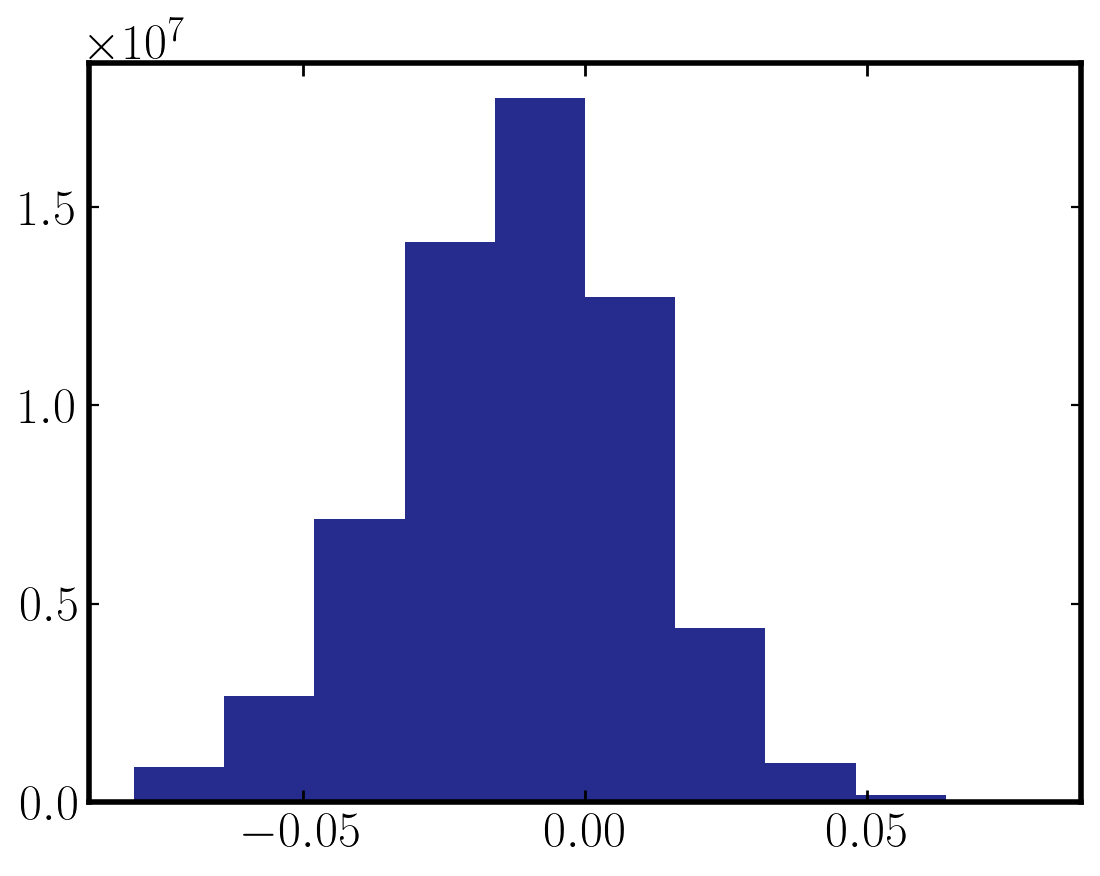

In [25]:
plt.hist(e1_2, range=(-0.08, 0.08))

(array([   49934.,   148738.,   744642.,  4058541., 15206441., 23603490.,
        12057995.,  3986182.,  1172445.,   341500.]),
 array([-0.04 , -0.032, -0.024, -0.016, -0.008,  0.   ,  0.008,  0.016,
         0.024,  0.032,  0.04 ]),
 <BarContainer object of 10 artists>)

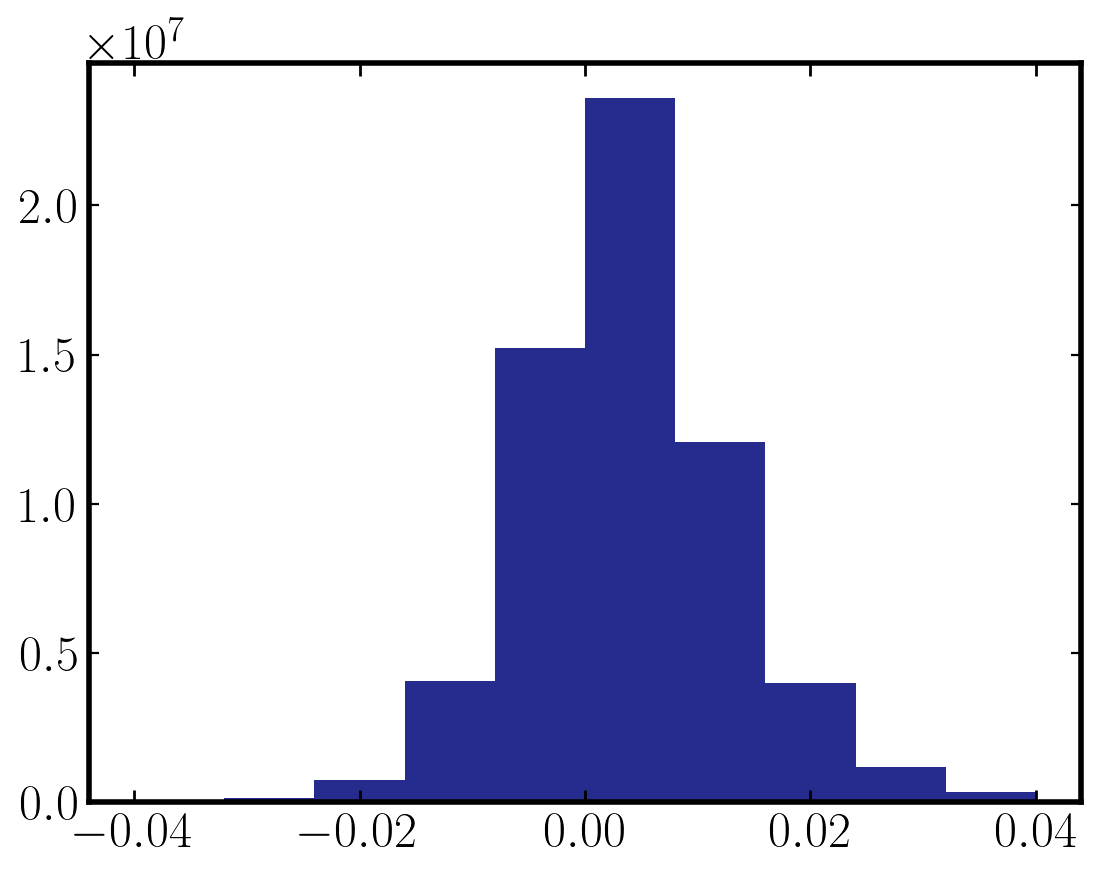

In [26]:
plt.hist(e1_4, range=(-0.04, 0.04))

In [159]:
a = fitsio.read("/lustre/work/xiangchong.li/work/hsc_s23b_data/catalogs/database/s23b-stars/stars.fits")

In [107]:
e1p, e2p = xlens.catalog.basic.get_psf_ellip(a)

In [106]:
e1s, e2s = xlens.catalog.basic.get_sdss_ellip(a)

In [119]:
msk = (~np.isnan(e1p)) & (~np.isnan(e1s))
e1p = e1p[msk]
e1s = e1s[msk]

msk = (~np.isnan(e2p)) & (~np.isnan(e2s))
e2p = e2p[msk]
e2s = e2s[msk]

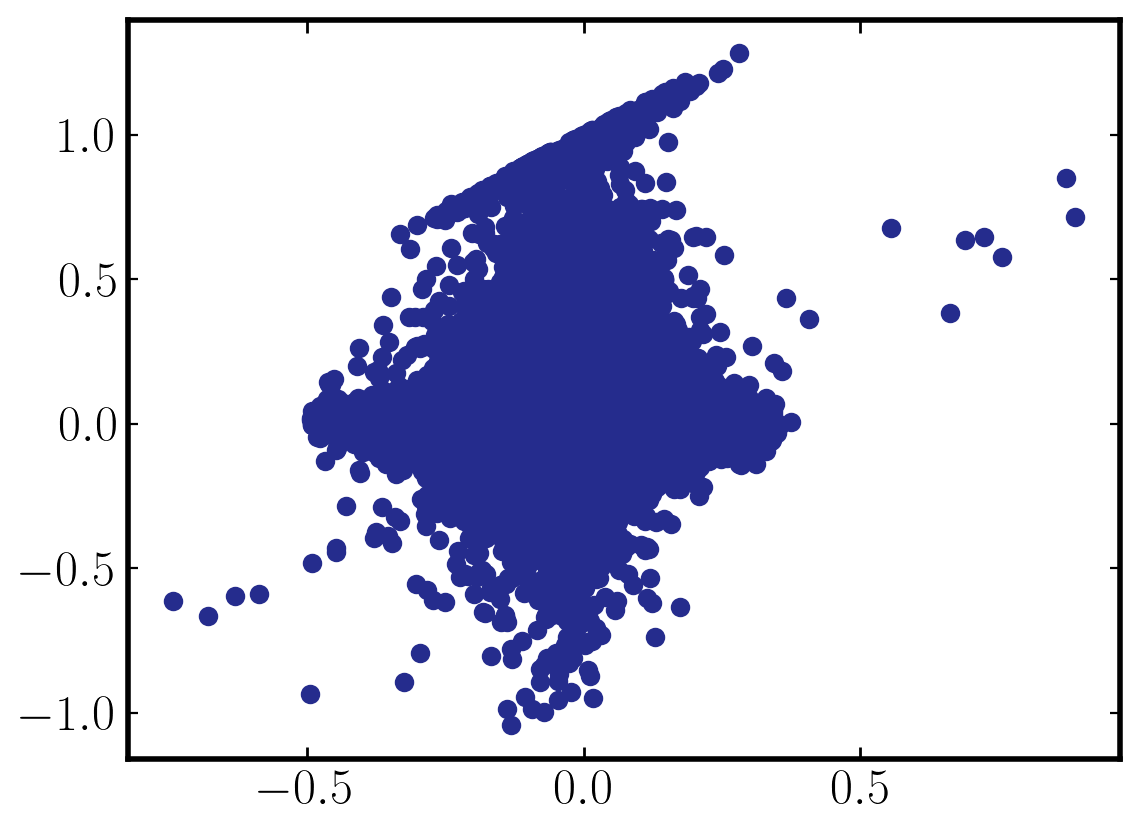

In [111]:
plt.scatter(e1p, e1p - e1s)

In [121]:
np.corrcoef(e1p, e1p - e1s)[0, 1]

0.017252969282838145

In [120]:
np.corrcoef(e2p, e2p - e2s)[0, 1]

0.02386990581944005

In [160]:
fwhm = xlens.catalog.basic.get_psf_size(a)

(array([ 12281.,  14654.,  19814.,  29240.,  43071.,  53490.,  60469.,
         68551.,  76114.,  81717.,  95094., 111898., 140438., 174413.,
        205193., 225703., 240782., 257293., 268899., 284261., 304903.,
        340355., 382244., 404201., 420670., 428741., 431028., 414703.,
        407235., 405180., 395729., 373164., 347080., 317368., 280848.,
        254143., 224363., 194020., 164556., 142223., 122692., 102396.,
         84010.,  68979.,  56405.,  48933.,  38584.,  34574.,  30565.,
         25461.]),
 array([0.40000001, 0.40799999, 0.41600001, 0.42399999, 0.43200001,
        0.44      , 0.44800001, 0.456     , 0.46399999, 0.472     ,
        0.47999999, 0.48800001, 0.49599999, 0.50400001, 0.51200002,
        0.51999998, 0.528     , 0.53600001, 0.54400003, 0.55199999,
        0.56      , 0.56800002, 0.57599998, 0.58399999, 0.59200001,
        0.60000002, 0.60799998, 0.616     , 0.62400001, 0.63200003,
        0.63999999, 0.648     , 0.65600002, 0.66399997, 0.67199999,
        

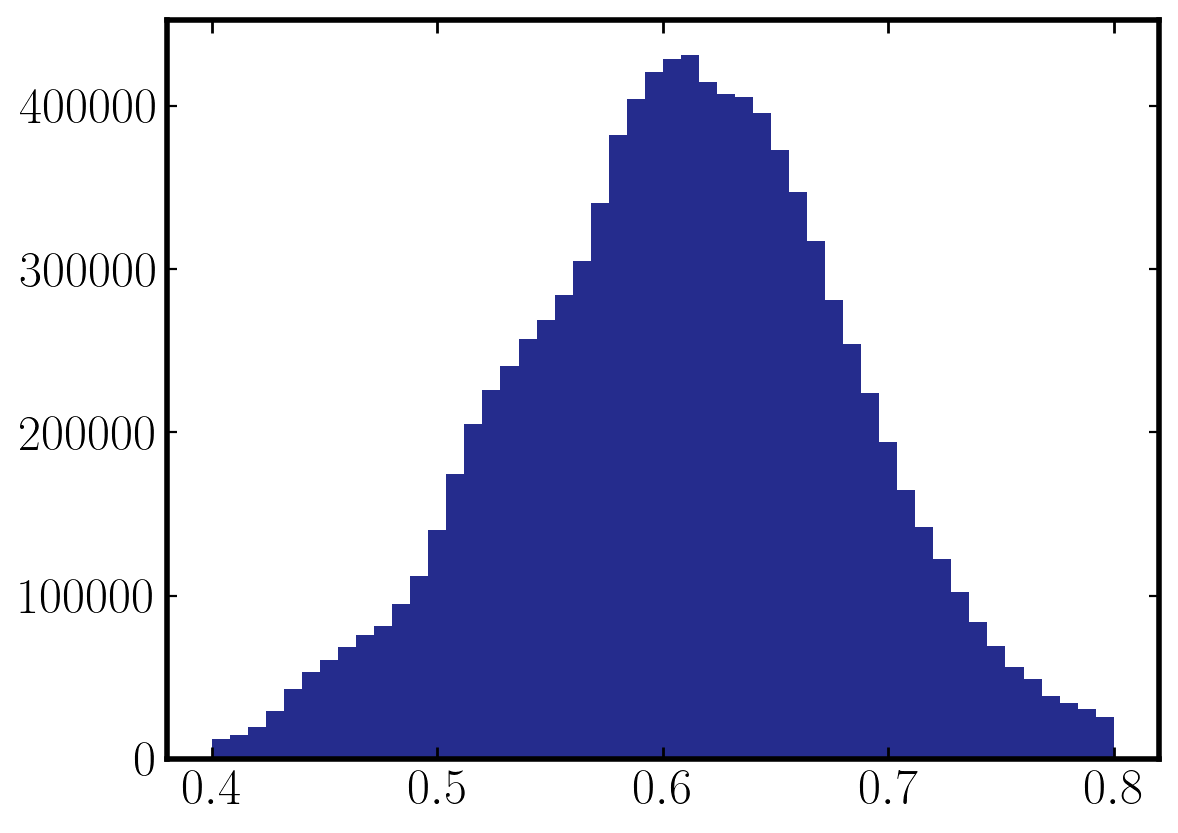

In [163]:
plt.hist(fwhm, bins=50, range=(0.4, 0.8))

In [182]:
import lsst.afw.table as afwtable
tract_id = 10041
patch_id = 2
cat_dir = "/lustre/HSC_DR/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas"
band = "i"
files = glob.glob(os.path.join(cat_dir, f"{tract_id}/{patch_id}/{band}/*"))
cat =  afwtable.SourceCatalog.readFits(files[0])

In [191]:
full = fitsio.read("/lustre/work/xiangchong.li/work/hsc_s23b_data/catalogs/tracts_fdfc_v1_trim2_sim.fits")

In [199]:
for tt in np.unique(full['tract']):
    print(f"wget -r -np -nH --cut-dirs=6 --reject 'index.html*' https://hscdata.mtk.nao.ac.jp/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/{tt}/ &&")
    

wget -r -np -nH --cut-dirs=6 --reject 'index.html*' https://hscdata.mtk.nao.ac.jp/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/8279/ &&
wget -r -np -nH --cut-dirs=6 --reject 'index.html*' https://hscdata.mtk.nao.ac.jp/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/8280/ &&
wget -r -np -nH --cut-dirs=6 --reject 'index.html*' https://hscdata.mtk.nao.ac.jp/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/8281/ &&
wget -r -np -nH --cut-dirs=6 --reject 'index.html*' https://hscdata.mtk.nao.ac.jp/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/8282/ &&
wget -r -np -nH --cut-dirs=6 --reject 'index.html*' https://hscdata.mtk.nao.ac.jp/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/8283/ &&
wget -r -np -nH --cut-dirs=6 --reject 'index.html*' https://hscdata.mtk.nao.ac.jp/hsc_ssp/dr4/s23b/data/s23b_wide/unified/deepCoadd_meas/8284/ &&
wget -r -np -nH --cut-dirs=6 --reject 'index.html*' https://hscdata.mtk.nao.ac.jp/hsc_ssp/dr4/s23b/data/s23b_wide/unified/de